In [48]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('grade.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [7]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [11]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [12]:
df.isnull().sum().sum()

425

hence there are 425 null values

In [9]:
df.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


In [13]:
df.replace(np.nan,0,inplace=True)
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [14]:
df.isnull().sum().sum()

0

since in the 4rth year there were many null values we can drop that column

In [15]:
input = df.drop(["CS-403","CS-421","CS-406","CS-414","CS-419","CS-423","CS-412", 'MT-442',"Seat No.","CGPA"], axis=1)
target = df[["CGPA"]]


In [16]:
pd.unique(df["PH-121"])

array(['B-', 'A', 'D', 'A-', 'B+', 'B', 'C+', 'C', 'C-', 'D+', 'WU', 'A+',
       'F'], dtype=object)

In [17]:
grades_enc = {'B-':2.7, 'A':4, 'D':1.0, 'A-':3.7, 'B+':3.4, 'B':3.0, 'C+':2.4, 'C':2.0, 'C-':1.7, 'D+':1.4, 'WU':0.0, 'A+':4,'F':0.0,'W':0,'I':0}

In [18]:
for item in input:
      input[item] = input[item].replace(grades_enc)

input.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,EF-303,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,1.7,2.4,3.0,2.0,2.4,2.0,1.7,2.0,1.7,1.7
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.0,1.7,3.7,1.4,1.7,2.0,3.7,1.0,1.4,1.0
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,2.4,4.0,3.4,3.7,3.0,3.4,3.7,3.7,3.0,3.0
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.0,2.7,1.0,2.7,1.4,1.4,3.4,1.7,1.4,2.0
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,1.7,3.7,2.7,3.7,2.4,3.7,2.7,3.7,2.7,3.4


In [20]:
df = pd.concat([input, target], axis=1)
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317,CGPA
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,2.4,3.0,2.0,2.4,2.0,1.7,2.0,1.7,1.7,2.205
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.7,3.7,1.4,1.7,2.0,3.7,1.0,1.4,1.0,2.008
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,4.0,3.4,3.7,3.0,3.4,3.7,3.7,3.0,3.0,3.608
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,2.7,1.0,2.7,1.4,1.4,3.4,1.7,1.4,2.0,1.906
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,3.7,2.7,3.7,2.4,3.7,2.7,3.7,2.7,3.4,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.0,4.0,4.0,3.7,4.0,4.0,3.7,3.7,4.0,3.4,...,3.7,3.7,4.0,4.0,4.0,4.0,3.4,3.7,3.7,3.798
567,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,3.7,3.4,3.4,3.772
568,3.0,4.0,3.7,3.4,4.0,4.0,4.0,4.0,4.0,3.0,...,2.7,3.4,3.4,4.0,3.0,2.4,3.4,3.7,3.0,3.470
569,4.0,3.4,1.0,4.0,1.0,1.4,2.7,1.7,2.7,1.7,...,2.0,2.0,2.4,1.7,1.0,2.7,3.4,1.0,3.0,2.193


<Axes: >

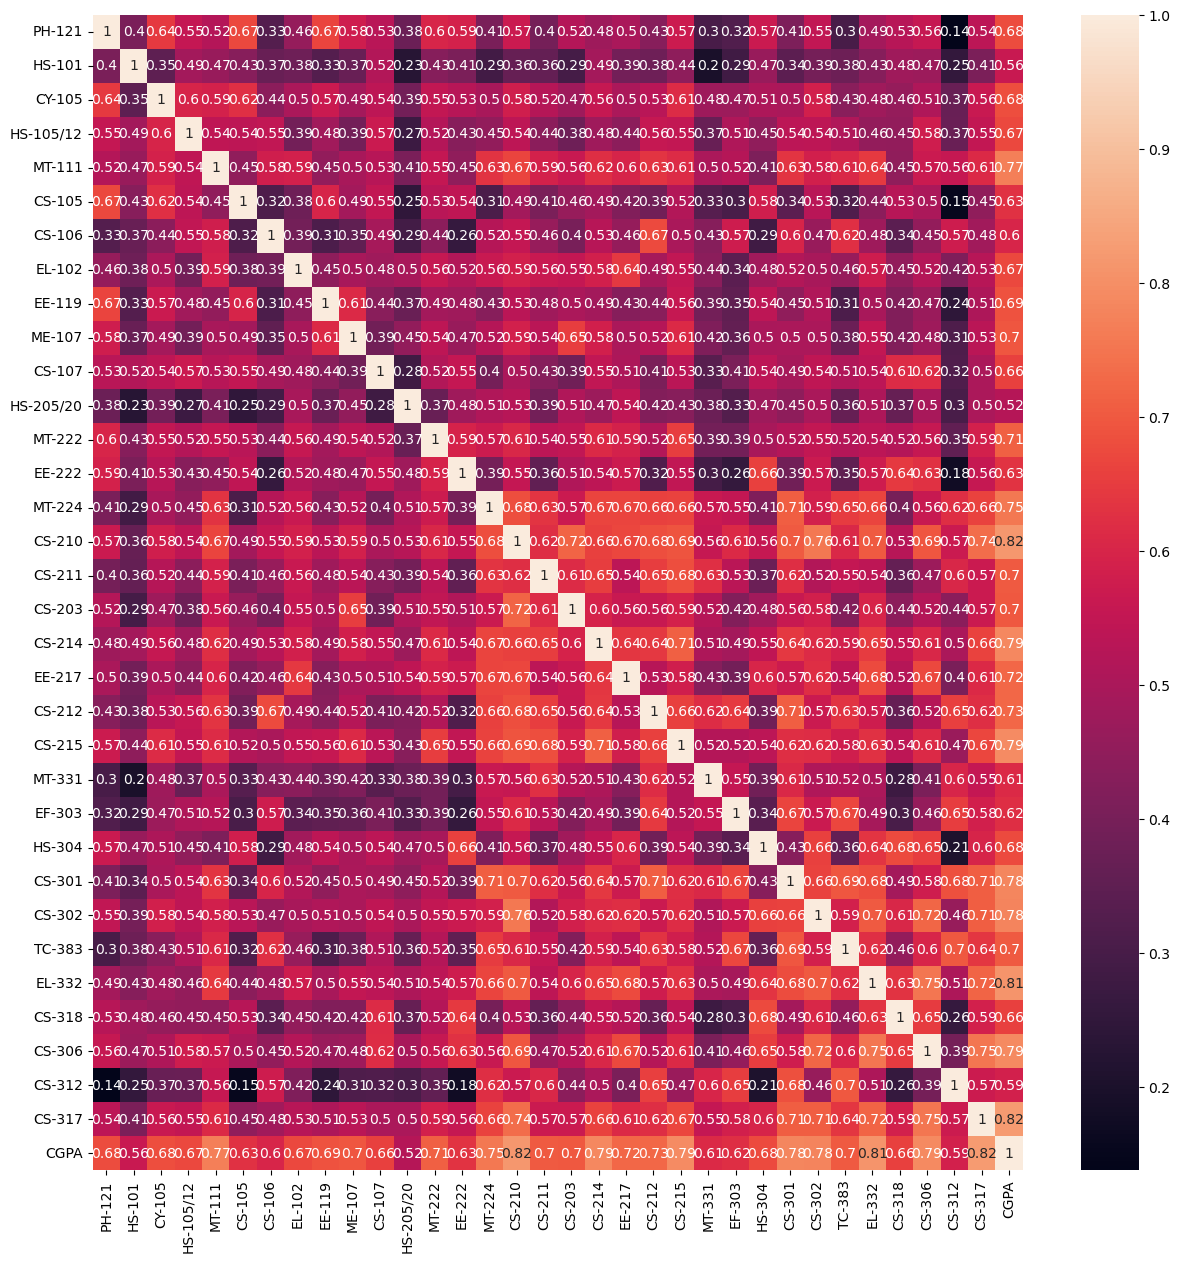

In [25]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_13604\822428371.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


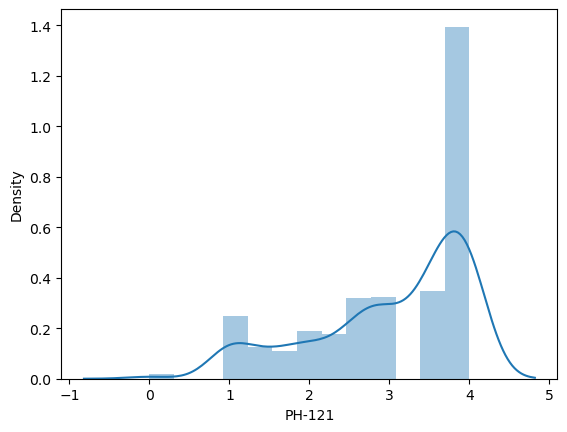

C:\Users\HP\AppData\Local\Temp\ipykernel_13604\822428371.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


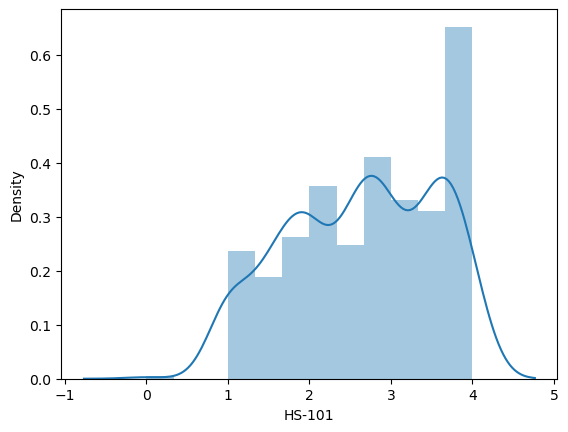

C:\Users\HP\AppData\Local\Temp\ipykernel_13604\822428371.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


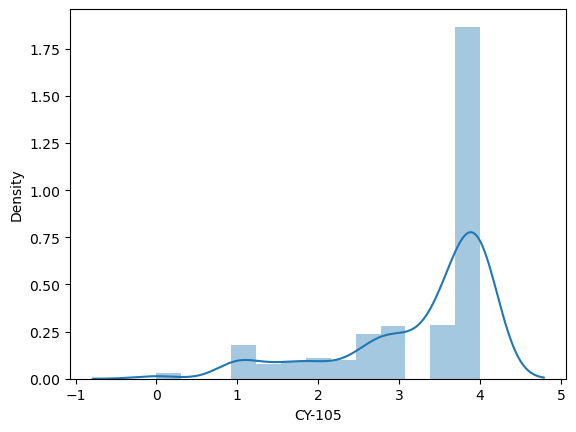

C:\Users\HP\AppData\Local\Temp\ipykernel_13604\822428371.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


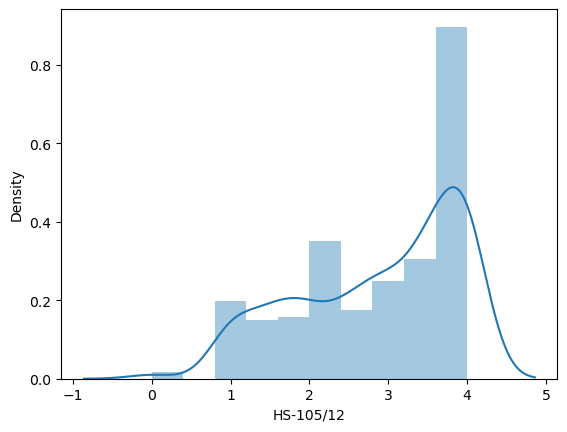

C:\Users\HP\AppData\Local\Temp\ipykernel_13604\822428371.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


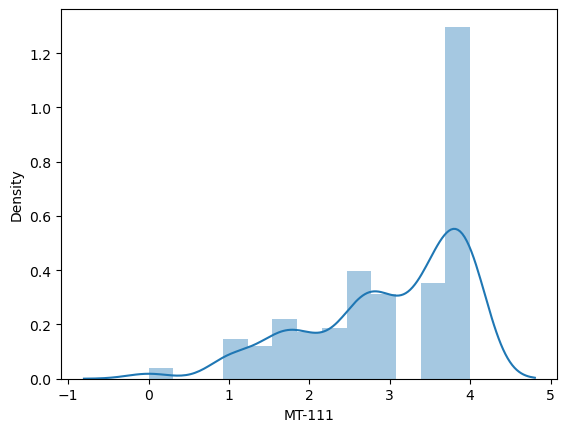

C:\Users\HP\AppData\Local\Temp\ipykernel_13604\822428371.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


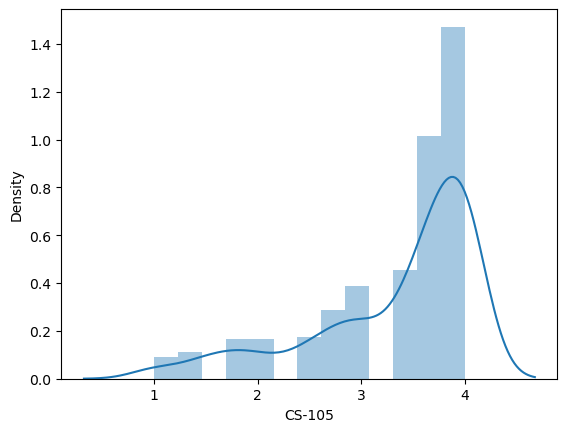

C:\Users\HP\AppData\Local\Temp\ipykernel_13604\822428371.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


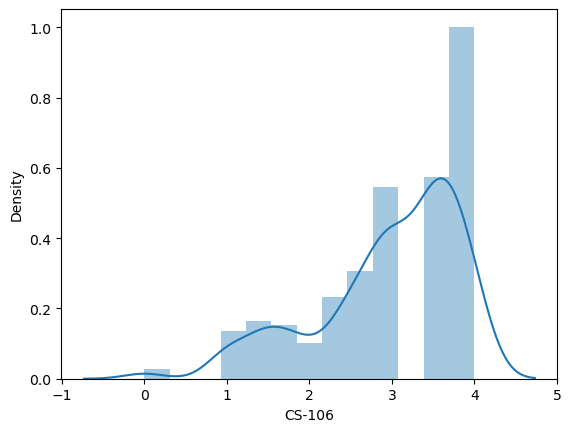

C:\Users\HP\AppData\Local\Temp\ipykernel_13604\822428371.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


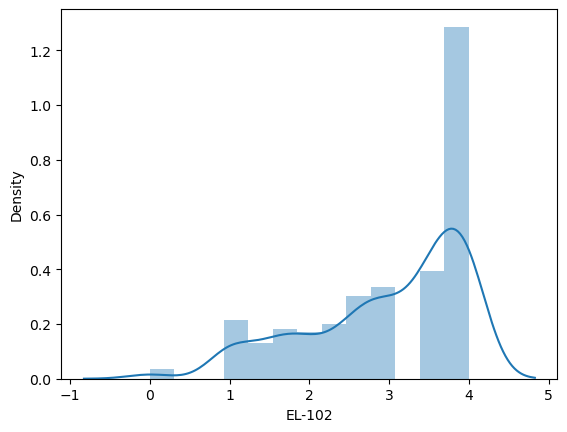

C:\Users\HP\AppData\Local\Temp\ipykernel_13604\822428371.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


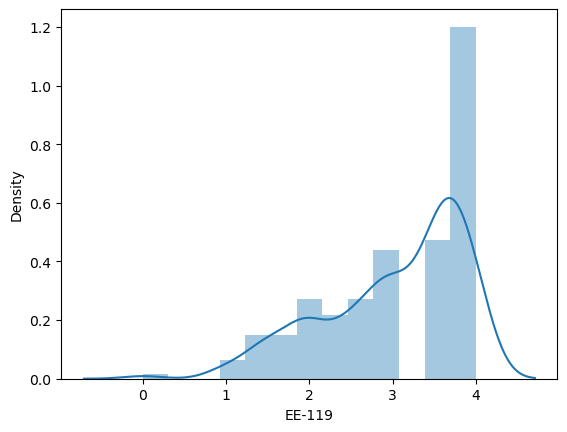

C:\Users\HP\AppData\Local\Temp\ipykernel_13604\822428371.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


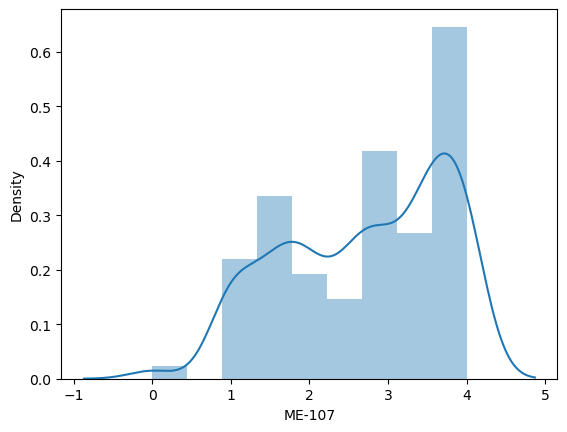

C:\Users\HP\AppData\Local\Temp\ipykernel_13604\822428371.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


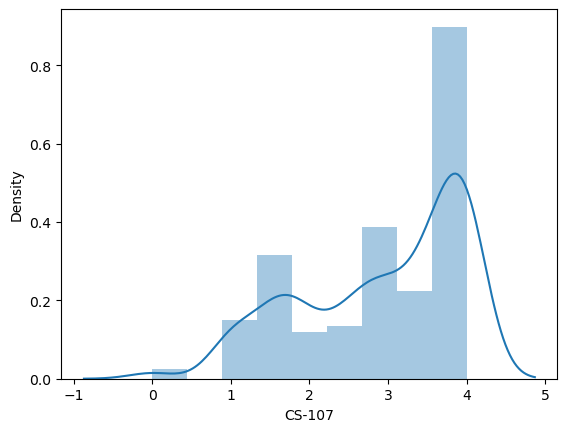

C:\Users\HP\AppData\Local\Temp\ipykernel_13604\822428371.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


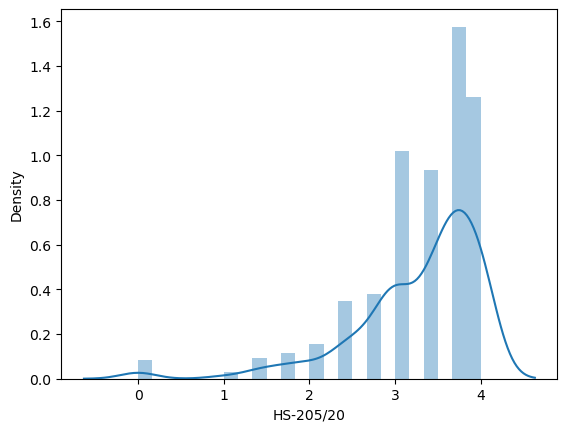

C:\Users\HP\AppData\Local\Temp\ipykernel_13604\822428371.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


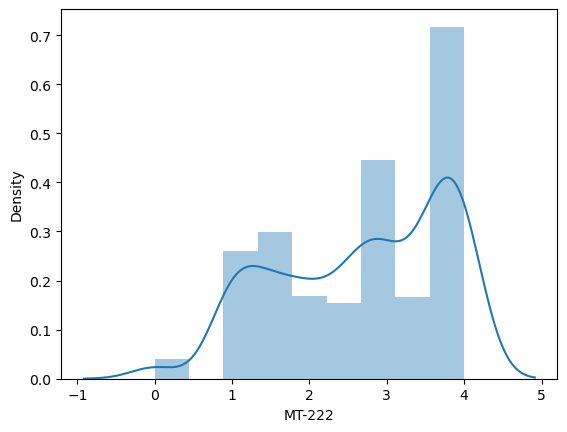

C:\Users\HP\AppData\Local\Temp\ipykernel_13604\822428371.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


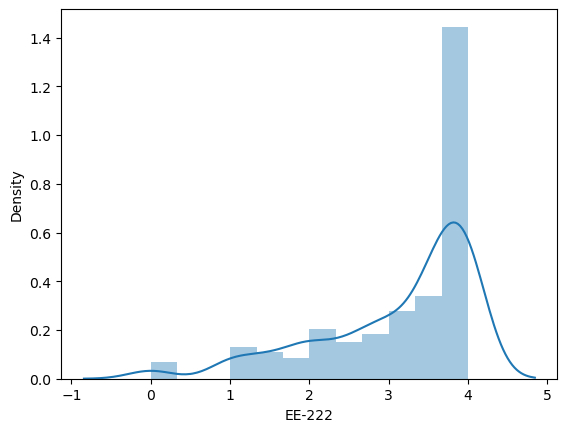

C:\Users\HP\AppData\Local\Temp\ipykernel_13604\822428371.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


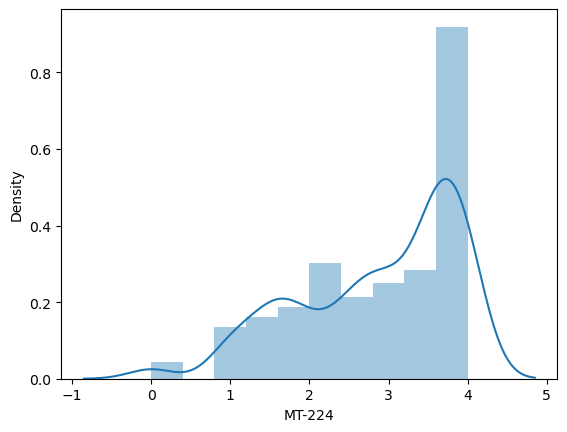

C:\Users\HP\AppData\Local\Temp\ipykernel_13604\822428371.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


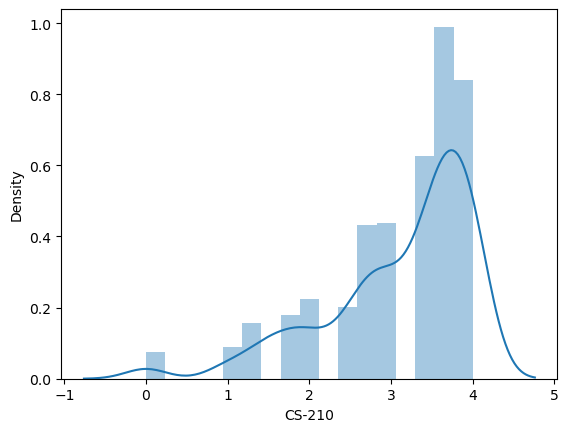

C:\Users\HP\AppData\Local\Temp\ipykernel_13604\822428371.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


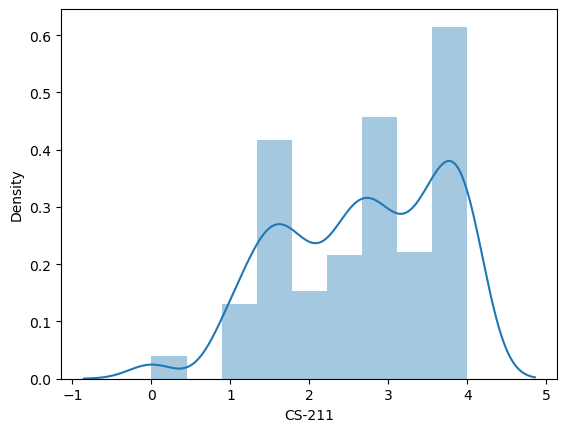

C:\Users\HP\AppData\Local\Temp\ipykernel_13604\822428371.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


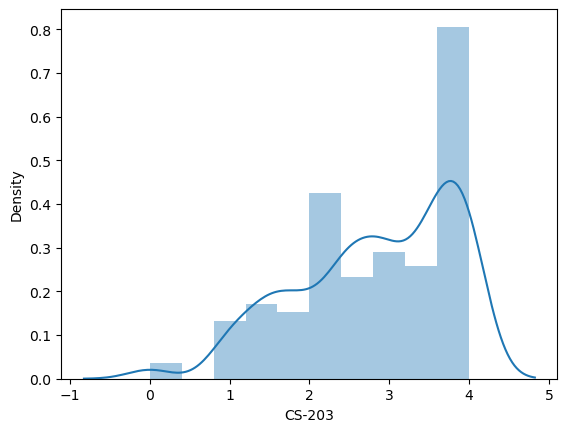

C:\Users\HP\AppData\Local\Temp\ipykernel_13604\822428371.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


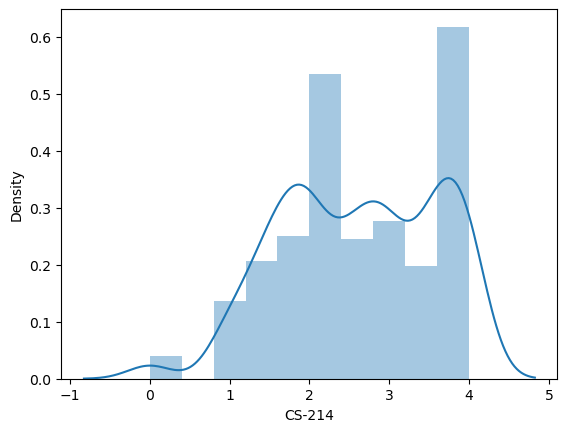

C:\Users\HP\AppData\Local\Temp\ipykernel_13604\822428371.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


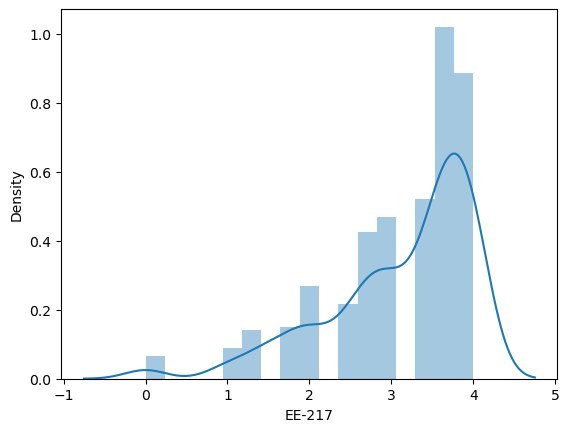

C:\Users\HP\AppData\Local\Temp\ipykernel_13604\822428371.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


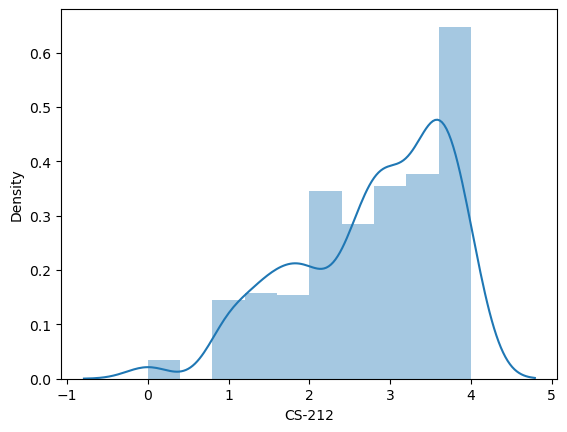

C:\Users\HP\AppData\Local\Temp\ipykernel_13604\822428371.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


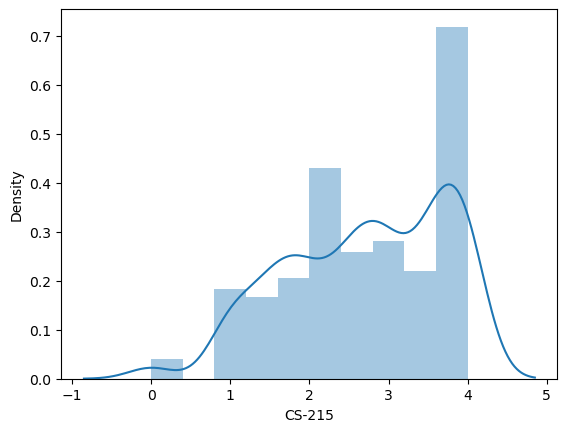

C:\Users\HP\AppData\Local\Temp\ipykernel_13604\822428371.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


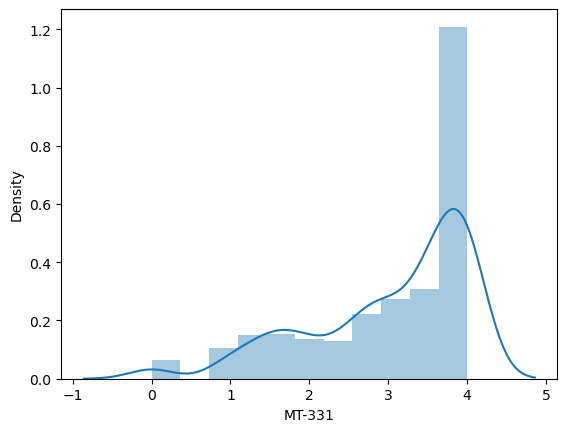

C:\Users\HP\AppData\Local\Temp\ipykernel_13604\822428371.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


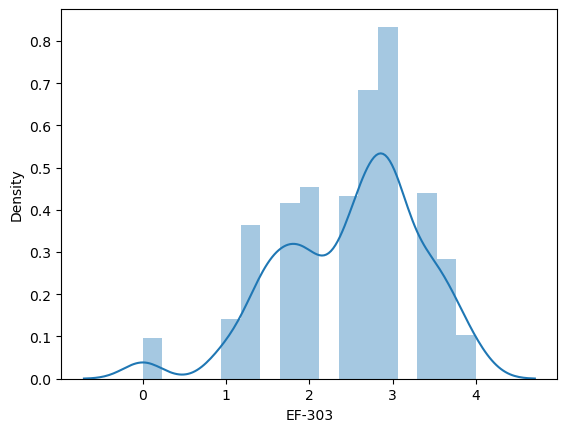

C:\Users\HP\AppData\Local\Temp\ipykernel_13604\822428371.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


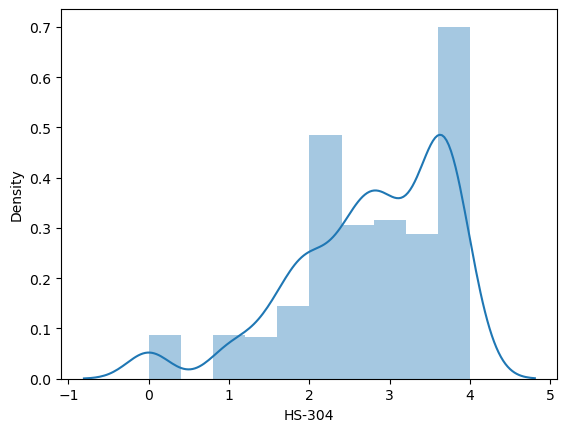

C:\Users\HP\AppData\Local\Temp\ipykernel_13604\822428371.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


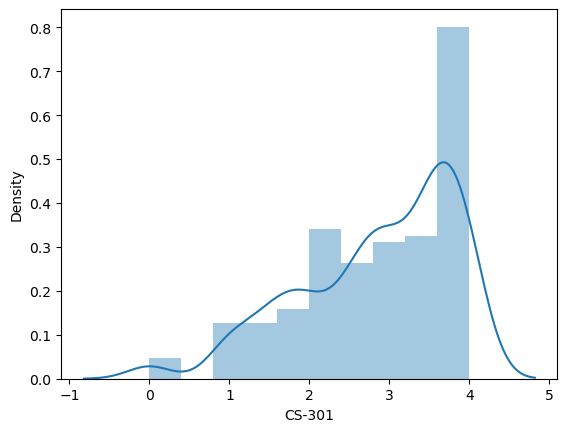

C:\Users\HP\AppData\Local\Temp\ipykernel_13604\822428371.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


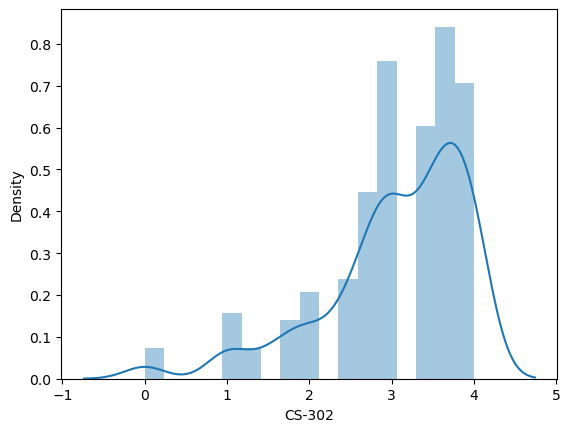

C:\Users\HP\AppData\Local\Temp\ipykernel_13604\822428371.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


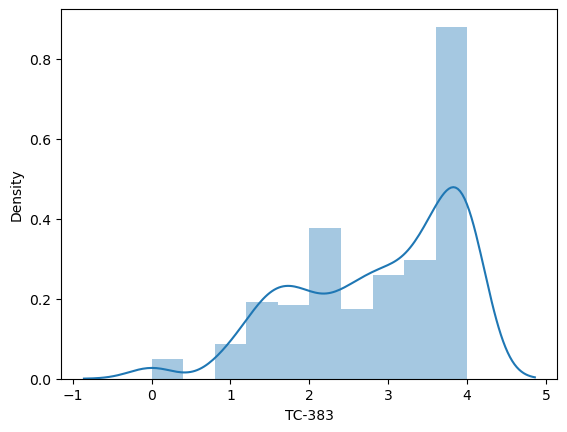

C:\Users\HP\AppData\Local\Temp\ipykernel_13604\822428371.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


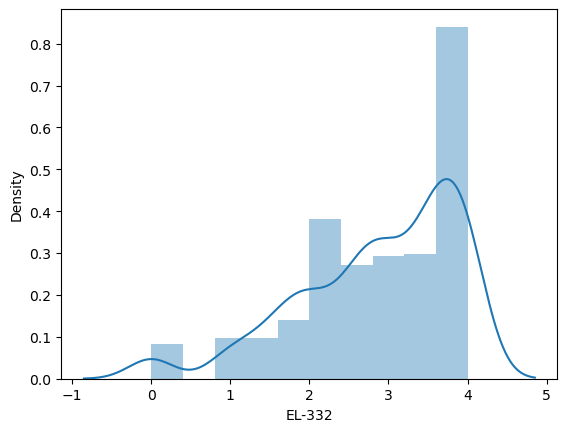

C:\Users\HP\AppData\Local\Temp\ipykernel_13604\822428371.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


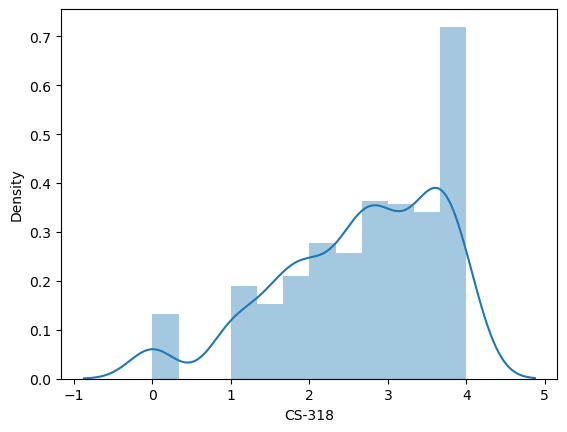

C:\Users\HP\AppData\Local\Temp\ipykernel_13604\822428371.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


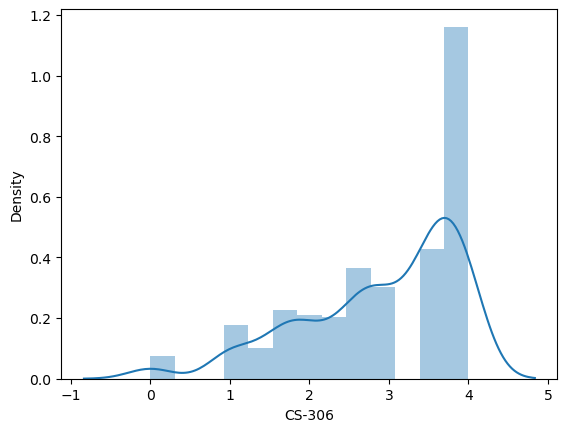

C:\Users\HP\AppData\Local\Temp\ipykernel_13604\822428371.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


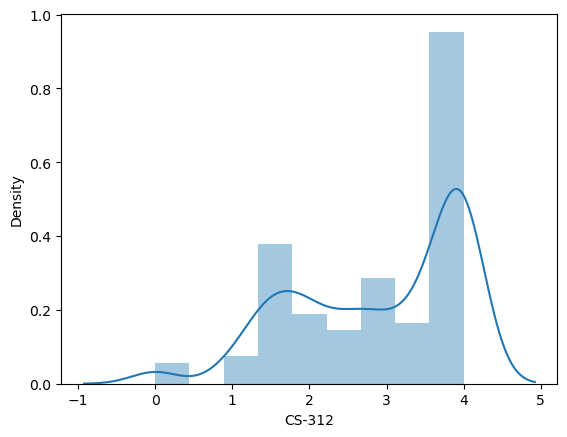

C:\Users\HP\AppData\Local\Temp\ipykernel_13604\822428371.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


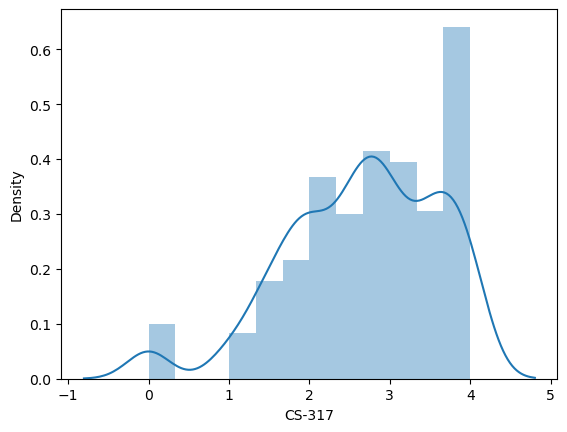

C:\Users\HP\AppData\Local\Temp\ipykernel_13604\822428371.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


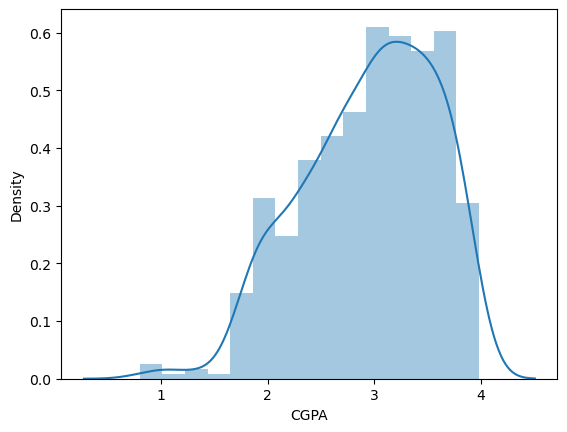

In [27]:
list=df.columns
for i in list:
    sns.distplot(df[i])
    plt.xlabel(i)
    plt.show()

from this grap we come to know that it is normalised

splitting Inputs and Targets

In [29]:
X=df.drop(columns=['CGPA'])
Y=df['CGPA']

In [32]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=42)

In [33]:
X_train.shape

(456, 33)

In [34]:
X_test.shape

(115, 33)

In [35]:
Y_train.shape

(456,)

In [36]:
Y_test.shape

(115,)

In [37]:
ln=LinearRegression()

In [38]:
ln.fit(X_train,Y_train)

LinearRegression()

In [39]:
predln=ln.predict(X_test)
predln

array([2.07243231, 3.5150231 , 2.84500644, 2.20596954, 3.79495635,
       3.52622442, 2.70919759, 2.42534662, 2.16714275, 3.20081109,
       3.46203242, 2.93606975, 3.69616179, 2.75947503, 3.9270608 ,
       2.54404739, 2.13425888, 3.5846328 , 2.38972145, 2.61061352,
       2.50902308, 3.81128238, 2.6121754 , 2.72440561, 2.92863038,
       3.37181923, 3.37237584, 2.82191395, 3.42261989, 3.34014339,
       2.65819473, 2.84237618, 3.45810549, 3.34464062, 3.73067796,
       3.05956616, 2.74091902, 3.82633236, 2.8056528 , 2.01485491,
       3.62620406, 3.37705832, 3.70604866, 3.64959458, 3.21778869,
       2.4339613 , 2.65710321, 3.08676157, 3.31224992, 3.6766233 ,
       3.29327583, 3.39046447, 3.16942056, 3.53370917, 3.34177465,
       3.04576484, 3.79092735, 3.73260303, 3.71885884, 2.88629525,
       3.56628598, 3.51374703, 3.73895768, 3.51757179, 3.23142692,
       3.15332659, 3.42319623, 3.31970875, 2.95983259, 2.33960154,
       3.65967926, 3.20968089, 2.65127387, 3.76940074, 3.89445

In [40]:
ln.score(X_train,Y_train)

0.9504518180400526

In [41]:
ln.coef_

array([ 0.01848757,  0.05605478, -0.01144668,  0.02243674,  0.07483689,
        0.02977433, -0.00551633,  0.02481181,  0.1111757 ,  0.04743573,
        0.010209  , -0.04645658,  0.01793365, -0.01212728,  0.05577518,
        0.02945332,  0.00426198,  0.01463302,  0.02736978, -0.01435386,
       -0.0048902 ,  0.02993889,  0.01156667,  0.0107777 ,  0.00856083,
        0.05889666,  0.01028947,  0.02573046,  0.04418847,  0.00669612,
        0.08773385,  0.00380993,  0.06002122])

In [42]:
ln.intercept_

0.6730471782462688

In [45]:
row_values=df.iloc[566].values
print(row_values)

[3.    4.    4.    3.7   4.    4.    3.7   3.7   4.    3.4   4.    4.
 4.    4.    4.    4.    4.    4.    4.    4.    3.    3.7   4.    3.
 3.7   3.7   4.    4.    4.    4.    3.4   3.7   3.7   3.798]


In [43]:
def predicttest(testvalue):
    testvalue=testvalue.reshape(1,-1)
    t=ln.predict(testvalue)
    print(t)

In [49]:
testvalue=np.array([3.,4.,4.,3.7,4.,4.,3.7,3.7,4.,3.4,4.,4.,4.,4.,4.,4.,4.,4.,4.,4.,3.,3.7,4.,3.,3.7,3.7,4.,4.,4.,4.,3.4,3.7,3.7])
predicttest(testvalue)

[3.73895768]


In [53]:
Data=[{'Actual Value':'3.789','Predicted Value':'3.73895768'}]

In [54]:
values=pd.DataFrame(Data)

In [55]:
values

,Actual Value,Predicted Value
0,3.789,3.73895768


Hence the predicted value and the actual values are almost same and it has the accuracy of 95% 